In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Title :Weed Detection  using Machine learning Techniques for Precision Agriculture.
This project aims to apply various supervised ML algorithms for weed detection.  At the end their performances will also be assessed. For this work images of the weed plants and normal plants are required. A publicly open dataset  from Kaggle was taken for the research purpose.
Data set is balanced data set.

In [ ]:
# import necessary packages

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import  train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import os
import glob
import cv2
import numpy as np
from skimage import data, io, filters


In [ ]:
#to Read image from Dataset folder
def getListOfFiles(dirName):
    # create a list of file and sub directories
    # names in the given directory
    listOfFile = os.listdir(dirName)
    allFiles = list()
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = os.path.join(dirName, entry)
        # If entry is a directory then get the list of files in this directory
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)

    return allFiles

In [ ]:
#To set path of the images from the Google Drive
imagePaths = getListOfFiles("/content/drive/MyDrive/Image/ML/dataset")## Folder structure: dataset --> sub-folders with labels name
print(imagePaths)

['/content/drive/MyDrive/Image/ML/dataset/paddy/Paddy (4).jpg', '/content/drive/MyDrive/Image/ML/dataset/paddy/Paddy (10).jpg', '/content/drive/MyDrive/Image/ML/dataset/paddy/Paddy (50).jpg', '/content/drive/MyDrive/Image/ML/dataset/paddy/Paddy (61).jpg', '/content/drive/MyDrive/Image/ML/dataset/paddy/Paddy (52).jpg', '/content/drive/MyDrive/Image/ML/dataset/paddy/Paddy (41).jpg', '/content/drive/MyDrive/Image/ML/dataset/paddy/Paddy (69).jpg', '/content/drive/MyDrive/Image/ML/dataset/paddy/Paddy (73).jpg', '/content/drive/MyDrive/Image/ML/dataset/paddy/Paddy (7).jpg', '/content/drive/MyDrive/Image/ML/dataset/paddy/Paddy (58).jpg', '/content/drive/MyDrive/Image/ML/dataset/paddy/Paddy (55).jpg', '/content/drive/MyDrive/Image/ML/dataset/paddy/Paddy (57).jpg', '/content/drive/MyDrive/Image/ML/dataset/paddy/Paddy (53).jpg', '/content/drive/MyDrive/Image/ML/dataset/paddy/Paddy (11).jpg', '/content/drive/MyDrive/Image/ML/dataset/paddy/Paddy (15).jpg', '/content/drive/MyDrive/Image/ML/dataset/

In [ ]:
#To read and preprocess image data
data = []
lables = []
c = 0 ## to see the progress
for image in imagePaths:

    lable = os.path.split(os.path.split(image)[0])[1]
    lables.append(lable)

    img = cv2.imread(image)
    img = cv2.resize(img, (32, 32), interpolation = cv2.INTER_AREA)
    img = filters.sobel(img )
    data.append(img)
    c=c+1
    

In [ ]:
print(lables)

['paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 'paddy', 

In [ ]:
# encode the labels as integer
data = np.array(data)
lables = np.array(lables)

In [ ]:
le = LabelEncoder()
lables = le.fit_transform(lables)

myset = set(lables)
print(myset)

{0, 1}


In [ ]:
#to print dataset information
dataset_size = data.shape[0]
data = data.reshape(dataset_size,-1)

print(data.shape)
print(lables.shape)
print(dataset_size)

(962, 3072)
(962,)
962


In [ ]:
#Splitting of dataset into training and test dataset
(trainX, testX, trainY, testY ) = train_test_split(data, lables, test_size= 0.25, random_state=42)



time taken= 0.24461793899536133
Accuracy: 0.941908713692946
              precision    recall  f1-score   support

       Other       1.00      0.89      0.94       127
       paddy       0.89      1.00      0.94       114

    accuracy                           0.94       241
   macro avg       0.95      0.94      0.94       241
weighted avg       0.95      0.94      0.94       241



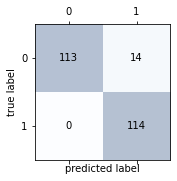

In [ ]:
#KNN classifier
from sklearn import metrics
import time

import matplotlib.pyplot as plt
begin = time.time()
model = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
model.fit(trainX, trainY)
y_pred = model.predict(testX)
end = time.time()
print('time taken=',end-begin)
print("Accuracy:",metrics.accuracy_score(testY, y_pred))
print(classification_report(testY, model.predict(testX), target_names=le.classes_))
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=testY, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
  for j in range(confmat.shape[1]):
     ax.text(x=j, y=i,s=confmat[i, j],va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

time taken= 0.04876303672790527
Accuracy: 0.9626556016597511
              precision    recall  f1-score   support

       Other       0.93      1.00      0.97       127
       paddy       1.00      0.92      0.96       114

    accuracy                           0.96       241
   macro avg       0.97      0.96      0.96       241
weighted avg       0.97      0.96      0.96       241



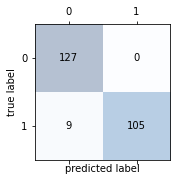

In [ ]:
#Naive Bayes classifier
from sklearn.naive_bayes import  MultinomialNB, GaussianNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
#Create a Gaussian Classifier
gnb = GaussianNB()
begin = time.time()
#Train the model using the training sets
gnb.fit(trainX, trainY)


#Predict the response for test dataset
y_pred = gnb.predict(testX)
end = time.time()
print('time taken=',end-begin)
print("Accuracy:",metrics.accuracy_score(testY, y_pred))
print(classification_report(testY, gnb.predict(testX), target_names=le.classes_))
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=testY, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
  for j in range(confmat.shape[1]):
     ax.text(x=j, y=i,s=confmat[i, j],va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

time taken= 0.018819093704223633
Accuracy: 0.9626556016597511
              precision    recall  f1-score   support

       Other       0.98      0.95      0.96       127
       paddy       0.95      0.97      0.96       114

    accuracy                           0.96       241
   macro avg       0.96      0.96      0.96       241
weighted avg       0.96      0.96      0.96       241



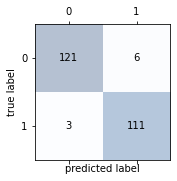

In [ ]:
#Multinomial classifier
mnb = MultinomialNB()
begin=time.time()
mnb.fit(trainX, trainY)
#Predict the response for test dataset
y_pred = mnb.predict(testX)
end = time.time()
print('time taken=',end-begin)
print("Accuracy:",metrics.accuracy_score(testY, y_pred))
print(classification_report(testY, mnb.predict(testX), target_names=le.classes_))
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=testY, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
  for j in range(confmat.shape[1]):
     ax.text(x=j, y=i,s=confmat[i, j],va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()


time taken= 0.20253944396972656
Accuracy: 0.9336099585062241
              precision    recall  f1-score   support

       Other       0.92      0.95      0.94       127
       paddy       0.95      0.91      0.93       114

    accuracy                           0.93       241
   macro avg       0.93      0.93      0.93       241
weighted avg       0.93      0.93      0.93       241



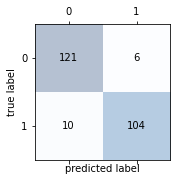

In [ ]:
#Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier( criterion = "gini", splitter='random', max_depth=8)
begin=time.time()
dtree.fit(trainX,trainY)
# Predicting the values of test data
y_pred = dtree.predict(testX)
end = time.time()
print('time taken=',end-begin)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(testY, y_pred))
print(classification_report(testY, dtree.predict(testX), target_names=le.classes_))
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=testY, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
  for j in range(confmat.shape[1]):
     ax.text(x=j, y=i,s=confmat[i, j],va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

time taken= 0.2623271942138672
Accuracy: 1.0
              precision    recall  f1-score   support

       Other       1.00      1.00      1.00       127
       paddy       1.00      1.00      1.00       114

    accuracy                           1.00       241
   macro avg       1.00      1.00      1.00       241
weighted avg       1.00      1.00      1.00       241



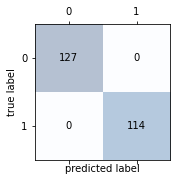

In [ ]:
# Support Vector machine classifier
from sklearn.svm import SVC
svn = SVC()
begin=time.time()
svn.fit(trainX, trainY)
# Predict from the test dataset
predictions = svn.predict(testX)
end = time.time()
print('time taken=',end-begin)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(testY, predictions))
print(classification_report(testY, svn.predict(testX), target_names=le.classes_))
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=testY, y_pred=predictions)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
  for j in range(confmat.shape[1]):
     ax.text(x=j, y=i,s=confmat[i, j],va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()


In [ ]:

#SVC classifier
from sklearn.svm import LinearSVC
lsvc = LinearSVC(verbose=0)
print(lsvc)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

LinearSVC()


LinearSVC()

time taken= 0.7227094173431396
Accuracy: 0.9875518672199171
              precision    recall  f1-score   support

       Other       0.98      1.00      0.99       127
       paddy       1.00      0.97      0.99       114

    accuracy                           0.99       241
   macro avg       0.99      0.99      0.99       241
weighted avg       0.99      0.99      0.99       241



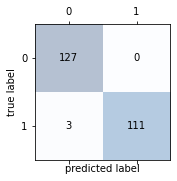

In [ ]:
begin=time.time()
lsvc.fit(trainX, trainY)
#score = lsvc.score(trainX, trainY)
#print("Score: ", score)
predictions = lsvc.predict(testX)
end = time.time()
print('time taken=',end-begin)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(testY, predictions))
print(classification_report(testY, lsvc.predict(testX), target_names=le.classes_))
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=testY, y_pred=predictions)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
  for j in range(confmat.shape[1]):
     ax.text(x=j, y=i,s=confmat[i, j],va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

time taken= 0.32375383377075195
Accuracy: 1.0
              precision    recall  f1-score   support

       Other       1.00      1.00      1.00       127
       paddy       1.00      1.00      1.00       114

    accuracy                           1.00       241
   macro avg       1.00      1.00      1.00       241
weighted avg       1.00      1.00      1.00       241



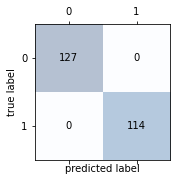

In [ ]:
#Logistic Regression classifier
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
begin=time.time()
classifier.fit(trainX, trainY)
y_pred=classifier.predict(testX)
end = time.time()
print('time taken=',end-begin)
predictions = classifier.predict(testX)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(testY, y_pred))
print(classification_report(testY, classifier.predict(testX), target_names=le.classes_))
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=testY, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
  for j in range(confmat.shape[1]):
     ax.text(x=j, y=i,s=confmat[i, j],va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

time taken= 2.5226621627807617
Accuracy: 0.983402489626556
              precision    recall  f1-score   support

       Other       0.98      1.00      0.99       127
       paddy       1.00      0.97      0.99       114

    accuracy                           0.99       241
   macro avg       0.99      0.99      0.99       241
weighted avg       0.99      0.99      0.99       241



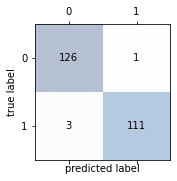

In [ ]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=150)
begin=time.time()
clf.fit(trainX,trainY)
y_pred=clf.predict(testX)
predictions = clf.predict(testX)
end = time.time()
print('time taken=',end-begin)
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(testY, y_pred))
print(classification_report(testY, lsvc.predict(testX), target_names=le.classes_))

from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=testY, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
  for j in range(confmat.shape[1]):
     ax.text(x=j, y=i,s=confmat[i, j],va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()